In [1]:
import librosa
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os

In [2]:
def extract_features(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    return np.mean(mfccs, axis=1)

In [3]:
def load_data(data_dir):
    features = []
    labels = []
    
    # Process each singer's folder
    for i, singer_folder in enumerate(sorted(os.listdir(data_dir))):
        folder_path = os.path.join(data_dir, singer_folder)
        
        if os.path.isdir(folder_path):
            print(f"Loading {singer_folder} samples...")
            
            for audio_file in os.listdir(folder_path):
                if audio_file.endswith('.wav'):
                    file_path = os.path.join(folder_path, audio_file)
                    voice_features = extract_features(file_path)
                    features.append(voice_features)
                    labels.append(i)  # 0 for first singer, 1 for second
    
    return np.array(features), np.array(labels)

In [66]:
data_dir = '/home/nirjhar/CODE/audio_test/dataset'

In [67]:
# Load the voice data
print("Loading voice samples...")
X, y = load_data(data_dir)

print(f"Total samples: {len(X)}")
print(f"Features per sample: {X.shape[1]}")

Loading voice samples...
Loading arijit samples...
Loading lata samples...
Total samples: 40
Features per sample: 13


In [68]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 28
Testing samples: 12


In [77]:
# Create and train SVM classifier
model = svm.SVC(kernel='poly', degree=3)
model.fit(X_train, y_train)

SVC(kernel='poly')

In [78]:
# Test the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f} ({accuracy*100:.1f}%)")

Accuracy: 0.83 (83.3%)


In [55]:
# Show some predictions
print("\nSample predictions:")
for i in range(min(5, len(X_test))):
    actual = "Lata" if y_test[i] == 0 else "Arijit"
    predicted = "Lata" if y_pred[i] == 0 else "Arijit"
    print(f"Actual: {actual}, Predicted: {predicted}")


Sample predictions:
Actual: Arijit, Predicted: Arijit
Actual: Arijit, Predicted: Arijit
Actual: Lata, Predicted: Lata
Actual: Arijit, Predicted: Arijit
Actual: Lata, Predicted: Lata


In [79]:
import matplotlib.pyplot as plt

In [80]:
kernels = ['Linear', 'Poly (d=2)', 'Poly (d=3)', 'RBF', 'Sigmoid']
accuracies_5s = [0.98, 0.93, 0.93, 0.93, 0.93]  # 5-second samples
accuracies_15s = [0.92, 0.92, 0.83, 0.92, 0.63]  # 15-second samples

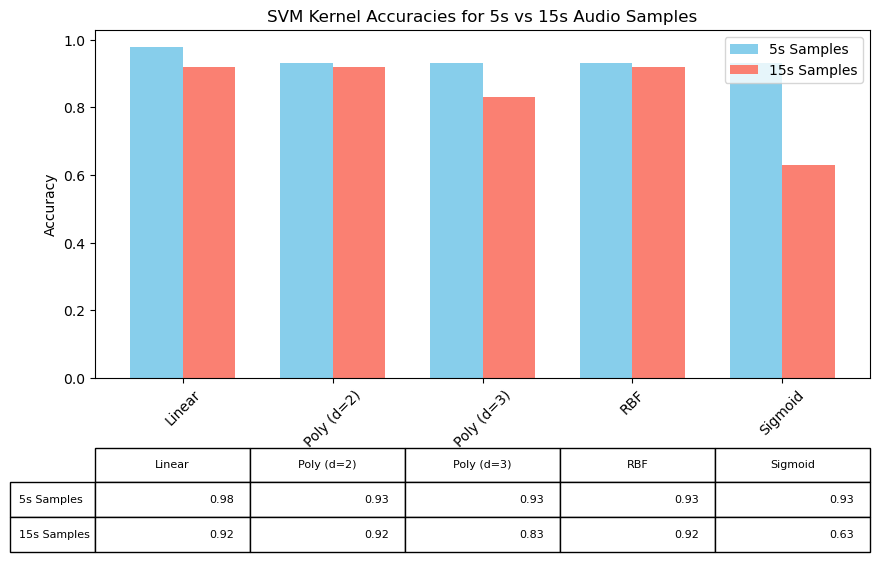

In [83]:
# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Bar positions
x = np.arange(len(kernels))
width = 0.35  # Width of bars

# Plot bars
ax.bar(x - width/2, accuracies_5s, width, label='5s Samples', color='skyblue')
ax.bar(x + width/2, accuracies_15s, width, label='15s Samples', color='salmon')

# Customize plot
ax.set_ylabel('Accuracy')
ax.set_title('SVM Kernel Accuracies for 5s vs 15s Audio Samples')
ax.set_xticks(x)
ax.set_xticklabels(kernels, rotation=45)
ax.legend()

# Add a table below the plot
table_data = [accuracies_5s, accuracies_15s]
row_labels = ['5s Samples', '15s Samples']
table = ax.table(cellText=table_data, rowLabels=row_labels, colLabels=kernels, loc='bottom', bbox=[0, -0.5, 1, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(8)

# Adjust layout to fit the table
plt.subplots_adjust(bottom=0.3)